In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`.
##Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [4]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [5]:
##5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [6]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [7]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [9]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [10]:
##6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
gdp_df=gdp_df.drop(columns=('Value Footnotes'))

In [12]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

In [13]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [14]:
##How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. 
##What do you notice? 



In [15]:
gdp_df['Year'].nunique()

34

In [16]:
gdp_year_count = gdp_df.groupby(['Country']).count().sort_values(by = 'Year')
gdp_year_count.head()

,Year,GDP_Per_Capita
Country,,
Djibouti,11,11
Turks and Caicos Islands,13,13
Sint Maarten (Dutch part),15,15
Kosovo,16,16
Faroe Islands,16,16


In [17]:
gdp_year_count.value_counts(gdp_year_count['Year'] <34)

Year
False    228
True      19
Name: count, dtype: int64

In [18]:
gdp_year_count[np.logical_or(gdp_year_count['Year'] <34,gdp_year_count['Year'] ==33 )]

,Year,GDP_Per_Capita
Country,,
Djibouti,11,11
Turks and Caicos Islands,13,13
Sint Maarten (Dutch part),15,15
Kosovo,16,16
Faroe Islands,16,16
Cayman Islands,18,18
Virgin Islands,21,21
Afghanistan,24,24
CuraÃ§ao,24,24


In [19]:
gdp_year_count[gdp_year_count['Year'] <34]

,Year,GDP_Per_Capita
Country,,
Djibouti,11,11
Turks and Caicos Islands,13,13
Sint Maarten (Dutch part),15,15
Kosovo,16,16
Faroe Islands,16,16
Cayman Islands,18,18
Virgin Islands,21,21
Afghanistan,24,24
CuraÃ§ao,24,24


In [20]:
##In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
##Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
##Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots?
##How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [21]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]
gdp_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

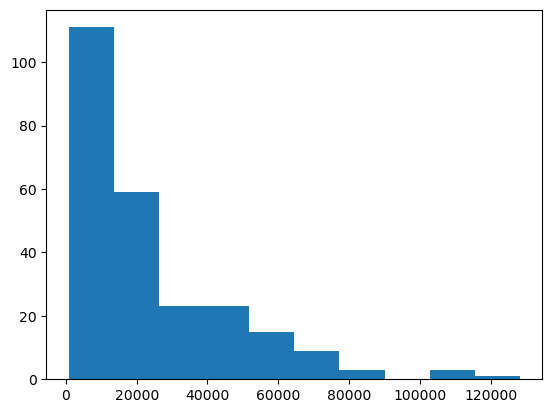

In [22]:
plt.hist(gdp_2020['GDP_Per_Capita'])

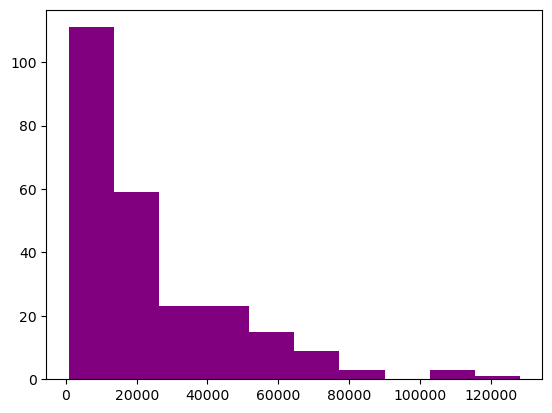

In [23]:
fig, ax = plt.subplots()
ax.hist(gdp_2020['GDP_Per_Capita'], color = 'purple')
plt.show()

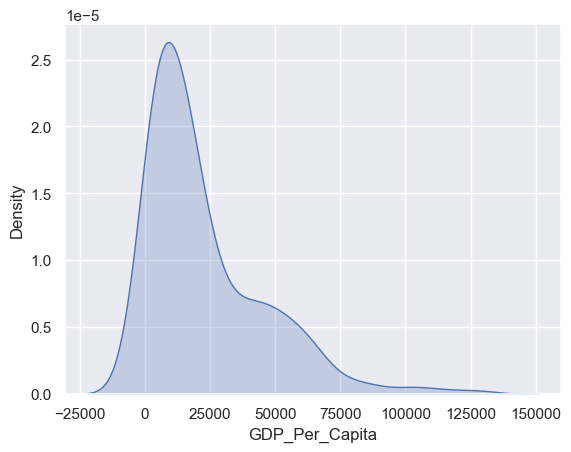

In [24]:
sns.set_theme(style="darkgrid")
sns.kdeplot(gdp_2020['GDP_Per_Capita'],warn_singular=False,fill=True )
plt.show()

<Axes: xlabel='GDP_Per_Capita'>

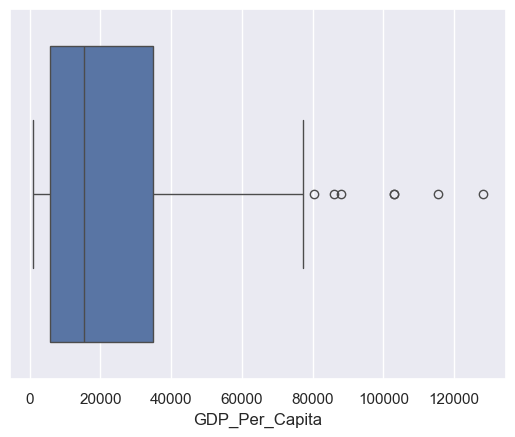

In [25]:
sns.boxplot(  x=gdp_2020["GDP_Per_Capita"] )

<Axes: xlabel='GDP_Per_Capita'>

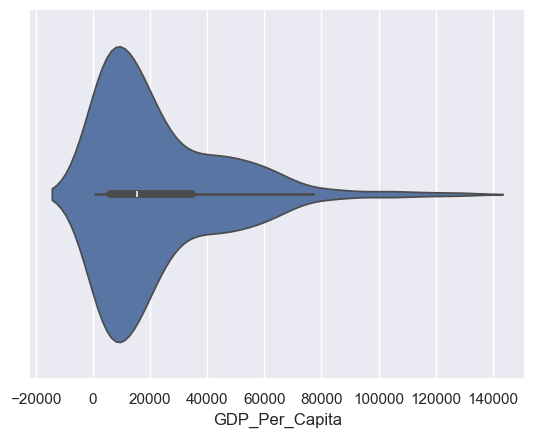

In [26]:
sns.violinplot(x=gdp_2020["GDP_Per_Capita"])

In [27]:
## What was the median GDP per capita value in 2020?

In [28]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

In [29]:
##For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020.
##Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.
##Using this, create the following 4 plots:
##	* A boxplot
##	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
##	* A scatterplot
##	* A scatterplot with a trend line overlaid
##Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [30]:
gdp_df['gdp_decades'] = (gdp_df['Year']// 10) *10
gdp_df.head()

,Country,Year,GDP_Per_Capita,gdp_decades
0,Afghanistan,2023,1992.424394,2020
1,Afghanistan,2022,1981.710168,2020
2,Afghanistan,2021,2144.166570,2020
3,Afghanistan,2020,2769.685745,2020
4,Afghanistan,2019,2927.245144,2010


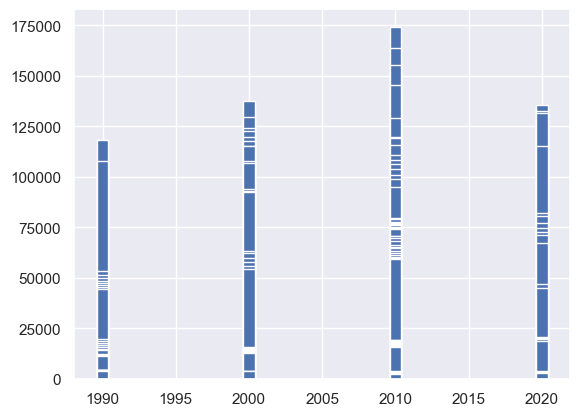

In [31]:

fig,ax = plt.subplots()
ax.bar(gdp_df['gdp_decades'], gdp_df['GDP_Per_Capita'])
plt.show()

(0.0, 60000.0)

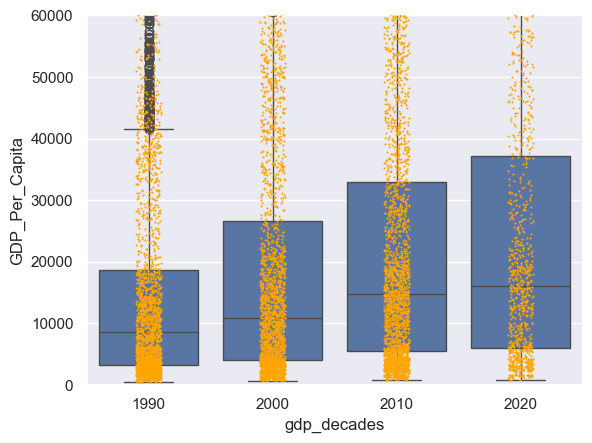

In [32]:
sns.boxplot(  x=gdp_df["gdp_decades"], y=gdp_df['GDP_Per_Capita' ])
ax = sns.stripplot(x=gdp_df["gdp_decades"], y=gdp_df['GDP_Per_Capita'], color="orange", jitter=0.1, size=1.5)
plt.ylim(0,60000)

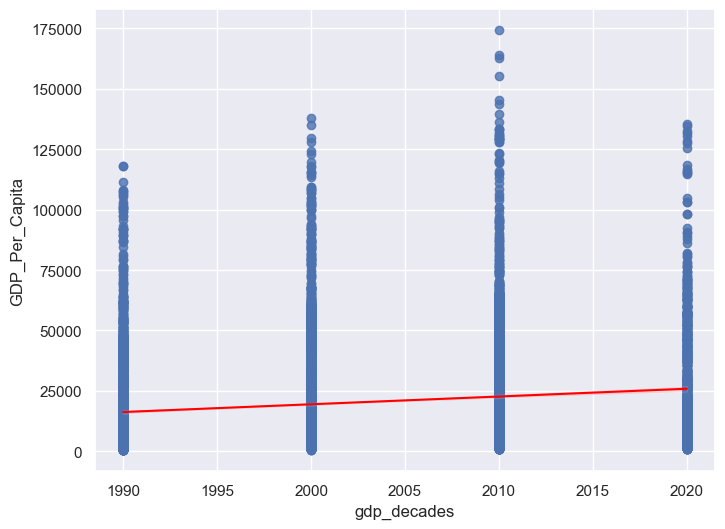

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_df["gdp_decades"],
    y=gdp_df["GDP_Per_Capita"],
    line_kws={"color": "red", "linewidth": 1.5},
    ax=ax
)
plt.show()

In [44]:
gdp_first_100000 = gdp_df[gdp_df['GDP_Per_Capita'] >100000]
gdp_first_100000.head(1)

,Country,Year,GDP_Per_Capita,gdp_decades
750,Bermuda,2011,101174.504104,2010


In [56]:
gdp_2020_max = [gdp_2020['GDP_Per_Capita'].max()]
gdp_2020_max.head()

AttributeError: 'list' object has no attribute 'head'